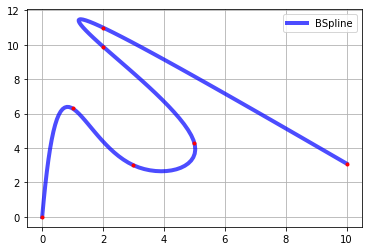

In [72]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
import scipy.interpolate as interpolate
from scipy import integrate
from scipy.misc import derivative
from pynverse import inversefunc
def B(x, k, i, t):
    if k == 0:
        return 1.0 if t[i] <= x < t[i+1] else 0.0
    if t[i+k] == t[i]:
        c1 = 0.0
    else:
        c1 = (x - t[i])/(t[i+k] - t[i]) * B(x, k-1, i, t)
    if t[i+k+1] == t[i+1]:
        c2 = 0.0
    else:
        c2 = (t[i+k+1] - x)/(t[i+k+1] - t[i+1]) * B(x, k-1, i+1, t)
    return c1 + c2
def bspline(x, t, c, k):
    n = len(t) - k - 1
    assert (n >= k+1) and (len(c) >= n)
    return sum(c[i] * B(x, k, i, t) for i in range(n))

k = 3
t = [0, 1, 2, 3, 4, 5, 6,7,8]
c = [-1, 2, 0, -1,3,4]

tt = np.array([ 0. ,  1,  2,  3,  4 , 5, 6])
x = np.array([ 0. ,  1,  3,  5,  2 ,2,  10])
y = np.array([ 0. ,  6.3,  3. ,  4.3,  9.9 ,11,  3.1])
ttt = np.linspace(0,6,100)
#x = np.linspace(-2 * np.pi, 2 * np.pi, 25)
#def f(x):
#    return np.sin(x) + 0.5 * x
#y = f(x)
tck1 = interpolate.splrep(tt, x, s=0, k=3)
tck2 = interpolate.splrep(tt, y, s=0, k=3)
t1, c1, k1 = interpolate.splrep(tt, x, s=0, k=3)
t2, c2, k2 = interpolate.splrep(tt, y, s=0, k=3)

spl1 = BSpline(t1, c1, k1)
spl2 = BSpline(t2, c2, k2)
#spl(2.5)
#bspline(2.5, t, c, k)
fig, ax = plt.subplots()
xx = np.linspace(-7, 7, 50)
#ax.plot(xx, [bspline(x, t, c ,k) for x in xx], 'r-', lw=3, label='naive')
#ax.plot(spl1(ttt), spl2(ttt), 'b-', lw=4, alpha=0.7, label='BSpline')
ax.plot( interpolate.splev(ttt,tck1),  interpolate.splev(ttt,tck2), 'b-', lw=4, alpha=0.7, label='BSpline')
ax.plot(x,y,'.r')
ax.grid(True)
ax.legend(loc='best')
plt.show()

In [75]:
tck
splll = interpolate.splev(ttt,tck)
#print(splll)
#spl1(ttt)
inversefunc(spl1, y_values=3)
spl1(2)

array(3.)

In [68]:
a = 3
b = interpolate.splev(a,tck)
c = spl1(a)
d= derivative(spl1,a,dx=1e-10)
e = interpolate.splev(a,tck,der=1)
print(b,c)
print(d,e)

5.000000000000002 5.000000000000002
-0.7291678372212118 -0.7291666666666663


In [ ]:
def dl(tt):
    dxdt = 
    return

In [43]:
f = lambda x: spl1(x)
derivative(f,3,dx=1e-10)
def df(tt):
    return np.sqrt(derivative(spl2,tt,dx=1e-10)**2+derivative(spl1,tt,dx=1e-10)**2)
df(3)
integrate.quad(df,0,6)

/home/robotics/anaconda3/envs/py3_bhl/lib/python3.6/site-packages/ipykernel_launcher.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  


(34.24495111366813, 1.5044599397064384e-05)

[ 1.03547637e+01  1.00891789e+01  9.82500465e+00  9.56224104e+00
  9.30088805e+00  9.04094569e+00  8.78241395e+00  8.52529284e+00
  8.26958235e+00  8.01528249e+00  7.76239325e+00  7.51091463e+00
  7.26084664e+00  7.01218928e+00  6.76494254e+00  6.51910642e+00
  6.27468093e+00  6.03166606e+00  5.79006181e+00  5.54986820e+00
  5.31108520e+00  5.07371283e+00  4.83775108e+00  4.60319996e+00
  4.37005947e+00  4.13832959e+00  3.90801035e+00  3.67910172e+00
  3.45160372e+00  3.22551635e+00  3.00083960e+00  2.77757347e+00
  2.55571797e+00  2.33527310e+00  2.11623884e+00  1.89861522e+00
  1.68240221e+00  1.46759983e+00  1.25420808e+00  1.04222695e+00
  8.31656446e-01  6.22496565e-01  4.14747309e-01  2.08408677e-01
  3.48066957e-03 -2.00036713e-01 -4.02143472e-01 -6.02839606e-01
 -8.02125115e-01 -1.00000000e+00]


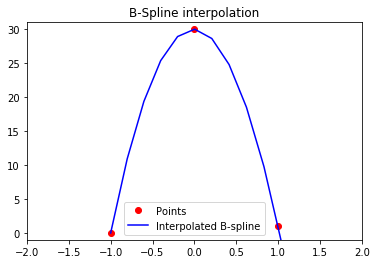

In [30]:
import numpy as np
from scipy import interpolate
 

#x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
#y = np.sin(x)

ctr =np.array( [(1 , 1),(0,30),  (-1, 0)])

x=ctr[:,0]
y=ctr[:,1]

#x=np.append(x,x[0])
#y=np.append(y,y[0])

tck,u = interpolate.splprep([x,y],k=2,s=0)
u=np.linspace(-4,1,num=50,endpoint=True)
out = interpolate.splev(u,tck)
print(out[0])
plt.figure()
plt.plot(x, y, 'ro', out[0], out[1], 'b')
plt.legend(['Points', 'Interpolated B-spline', 'True'],loc='best')
plt.axis([min(x)-1, max(x)+1, min(y)-1, max(y)+1])
plt.title('B-Spline interpolation')
plt.show()

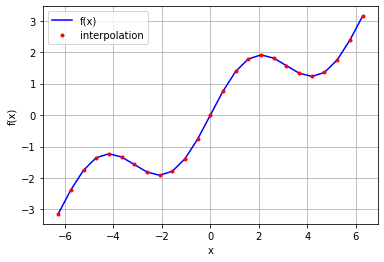

In [35]:
import scipy.interpolate as spi

x = np.linspace(-2 * np.pi, 2 * np.pi, 25)
def f(x):
    return np.sin(x) + 0.5 * x
ipo = spi.splrep(x, f(x), k=1)
ipo
xx = np.linspace(-1,1,25)
iy = spi.splev(x, ipo)
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [36]:
print(iy)

[-3.14159265 -2.37979327 -1.75196847 -1.35619449 -1.2283697  -1.33259571
 -1.57079633 -1.80899694 -1.91322295 -1.78539816 -1.38962418 -0.76179939
  0.          0.76179939  1.38962418  1.78539816  1.91322295  1.80899694
  1.57079633  1.33259571  1.2283697   1.35619449  1.75196847  2.37979327
  3.14159265]
